### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


#1. Análisis de facturación



In [11]:
# prompt: Ingreso total por cada tienda
# En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de las 4 tiendas que tenemos como variables para poder estimar los ingresos brutos.
# Ten en cuenta que debes representarlos como dinero $ y sin decimales. Además ten en cuenta que cada 3 números va una ",".
# Ahora debes añadir un list comprehension que sume todos los precios en uno para ver el total general.
# Ahora añade un % respectivo a cada tienda vs el total, este porcentaje debe estar en la fstring  de los 4 primeros prints.

total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

total_general = sum([total_tienda1, total_tienda2, total_tienda3, total_tienda4])

porcentaje_tienda1 = (total_tienda1 / total_general) * 100
porcentaje_tienda2 = (total_tienda2 / total_general) * 100
porcentaje_tienda3 = (total_tienda3 / total_general) * 100
porcentaje_tienda4 = (total_tienda4 / total_general) * 100

print(f"Ingreso total tienda 1: ${total_tienda1:,.0f} ({porcentaje_tienda1:.2f}%)")
print(f"Ingreso total tienda 2: ${total_tienda2:,.0f} ({porcentaje_tienda2:.2f}%)")
print(f"Ingreso total tienda 3: ${total_tienda3:,.0f} ({porcentaje_tienda3:.2f}%)")
print(f"Ingreso total tienda 4: ${total_tienda4:,.0f} ({porcentaje_tienda4:.2f}%)")

total_general_list_comp = sum([df['Precio'].sum() for df in [tienda, tienda2, tienda3, tienda4]])
print(f"Ingreso total general: ${total_general_list_comp:,.0f}")

Ingreso total tienda 1: $1,150,880,400 (26.13%)
Ingreso total tienda 2: $1,116,343,500 (25.35%)
Ingreso total tienda 3: $1,098,019,600 (24.93%)
Ingreso total tienda 4: $1,038,375,700 (23.58%)
Ingreso total general: $4,403,619,200


# 2. Ventas por categoría

In [21]:
def get_unique_categories(df):
    unique_categories = []
    for category in df['Categoría del Producto']:
        if category not in unique_categories:
            unique_categories.append(category)
    return unique_categories

def count_sales_by_category(df):
    categories = list(df['Categoría del Producto'])
    unique_categories = get_unique_categories(df)
    # Usa una comprensión de diccionario para contar las ventas por categoría
    sales_count = {category: categories.count(category) for category in unique_categories}
    return sales_count

# --- Nueva función para calcular el monto total vendido por categoría ---
def calculate_total_amount_by_category(df):
    unique_categories = get_unique_categories(df)
    # Usa una comprensión de diccionario para sumar los precios por categoría
    total_amounts = {category: df[df['Categoría del Producto'] == category]['Precio'].sum()
                     for category in unique_categories}
    return total_amounts

tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_por_categoria = {f'Tienda {i+1}': count_sales_by_category(df) for i, df in enumerate(tiendas)}
monto_total_por_categoria = {f'Tienda {i+1}': calculate_total_amount_by_category(df) for i, df in enumerate(tiendas)}


for i, (tienda_name, ventas_info) in enumerate(ventas_por_categoria.items()):
    # Obtener el diccionario de montos totales para la tienda actual
    monto_info = monto_total_por_categoria[tienda_name]

    # Crear un DataFrame combinado
    # Primero, convertimos el diccionario de cantidades a un DataFrame temporal
    df_temp_cantidad = pd.DataFrame(ventas_info.items(), columns=['Categoría', 'Cantidad Vendida'])

    # Luego, convertimos el diccionario de montos a un DataFrame temporal
    df_temp_monto = pd.DataFrame(monto_info.items(), columns=['Categoría', 'Monto Total Vendido'])

    # Unimos ambos DataFrames temporales por la columna 'Categoría'
    # Esto nos permite tener ambas métricas en una sola tabla
    df_combinado = pd.merge(df_temp_cantidad, df_temp_monto, on='Categoría', how='left')

    # Convertir 'Monto Total Vendido' a numérico para poder ordenar
    # Primero removemos el '$' y las comas, luego convertimos a float
    df_combinado['Monto Total Vendido Numerico'] = df_combinado['Monto Total Vendido'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

    # Ordenar el DataFrame por la nueva columna numérica (de menor a mayor)
    df_combinado = df_combinado.sort_values(by='Monto Total Vendido Numerico', ascending=True)

    # Formatear la columna 'Monto Total Vendido' como dinero (después de ordenar)
    # Usamos una función lambda con f-string para el formato deseado: $, sin decimales, con comas
    df_combinado['Monto Total Vendido'] = df_combinado['Monto Total Vendido Numerico'].apply(lambda x: f"${x:,.0f}")

    # Eliminar la columna numérica temporal, ya no es necesaria para la visualización
    df_combinado = df_combinado.drop(columns=['Monto Total Vendido Numerico'])

    print(f"\n--- Ventas y Monto Total por Categoría en {tienda_name} (Ordenado por Monto) ---")
    display(df_combinado)



--- Ventas y Monto Total por Categoría en Tienda 1 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
6,Libros,173,"$8,784,900"
4,Artículos para el hogar,171,"$12,698,400"
2,Juguetes,324,"$17,995,700"
5,Deportes y diversión,284,"$39,290,000"
7,Instrumentos musicales,182,"$91,299,000"
1,Muebles,465,"$187,633,700"
3,Electrodomésticos,312,"$363,685,200"
0,Electrónicos,448,"$429,493,500"



--- Ventas y Monto Total por Categoría en Tienda 2 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
7,Libros,197,"$10,091,200"
4,Artículos para el hogar,181,"$14,746,900"
5,Juguetes,313,"$15,945,400"
2,Deportes y diversión,275,"$34,744,500"
1,Instrumentos musicales,224,"$104,990,300"
0,Muebles,442,"$176,426,300"
6,Electrodomésticos,305,"$348,567,800"
3,Electrónicos,422,"$410,831,100"



--- Ventas y Monto Total por Categoría en Tienda 3 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
7,Libros,185,"$9,498,700"
6,Artículos para el hogar,177,"$15,060,000"
5,Juguetes,315,"$19,401,100"
3,Deportes y diversión,277,"$35,593,100"
2,Instrumentos musicales,177,"$77,380,900"
1,Muebles,499,"$201,072,100"
0,Electrodomésticos,278,"$329,237,900"
4,Electrónicos,451,"$410,775,800"



--- Ventas y Monto Total por Categoría en Tienda 4 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
3,Libros,187,"$9,321,300"
7,Artículos para el hogar,201,"$15,074,500"
6,Juguetes,338,"$20,262,200"
2,Deportes y diversión,277,"$33,350,100"
5,Instrumentos musicales,170,"$75,102,400"
1,Muebles,480,"$192,528,900"
0,Electrodomésticos,254,"$283,260,200"
4,Electrónicos,451,"$409,476,100"


# 3. Calificación promedio de la tienda


In [22]:

# En este paso, se calculará la calificación promedio de los clientes para cada tienda.
# El objetivo es conocer la satisfacción del cliente con los productos vendidos.

# Diccionario para almacenar las calificaciones promedio de cada tienda
calificaciones_promedio_tiendas = {}

# Iterar sobre cada DataFrame de tienda
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'
    # Calcular el promedio de la columna 'Calificación'
    # Se utiliza .mean() para obtener el promedio de los valores numéricos
    # .round(2) para redondear a dos decimales, para una mejor legibilidad
    promedio_calificacion = df['Calificación'].mean().round(2)
    calificaciones_promedio_tiendas[tienda_name] = promedio_calificacion

# Convertir el diccionario de calificaciones promedio a un DataFrame de Pandas para una mejor visualización
df_calificaciones_promedio = pd.DataFrame(
    calificaciones_promedio_tiendas.items(),
    columns=['Tienda', 'Calificación Promedio']
)

print("\n--- Calificación Promedio de Clientes por Tienda ---")
# Mostrar el DataFrame de calificaciones promedio
display(df_calificaciones_promedio)



--- Calificación Promedio de Clientes por Tienda ---


,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [31]:

# En este paso, se identificarán los productos más y menos vendidos en cada tienda.
# Se mostrará el top 3 de los productos más vendidos y el top 3 de los menos vendidos.

# Función auxiliar para obtener elementos únicos (reutilizada de get_unique_categories)
def get_unique_items(items_list):
    unique_items = []
    for item in items_list:
        if item not in unique_items:
            unique_items.append(item)
    return unique_items

# Función para contar las ventas de cada producto
def get_product_counts(df):
    product_names = list(df['Producto'])
    unique_products = get_unique_items(product_names)
    # Usa una comprensión de diccionario para contar las ventas de cada producto
    product_counts = {product: product_names.count(product) for product in unique_products}
    return product_counts

# Diccionario para almacenar los resultados de los top/bottom productos por tienda
resultados_productos_por_tienda = {}

# Iterar sobre cada DataFrame de tienda para encontrar los productos más y menos vendidos
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'

    # Obtener el conteo de ventas por producto para la tienda actual
    product_sales_counts = get_product_counts(df)

    # Convertir el diccionario a una lista de tuplas y ordenar por cantidad de ventas
    # sorted() ordena de mayor a menor para los más vendidos
    sorted_products_desc = sorted(product_sales_counts.items(), key=lambda item: item[1], reverse=True)
    # sorted() ordena de menor a mayor para los menos vendidos
    sorted_products_asc = sorted(product_sales_counts.items(), key=lambda item: item[1], reverse=False)

    # Obtener el top 3 de productos más vendidos
    top_3_most_sold = sorted_products_desc[:3]
    # Obtener el top 3 de productos menos vendidos
    # Asegúrate de que haya al menos 3 productos para evitar errores si el DataFrame es muy pequeño
    bottom_3_least_sold = sorted_products_asc[:3] if len(sorted_products_asc) >= 3 else sorted_products_asc

    # Almacenar los resultados en el diccionario para cada tienda
    resultados_productos_por_tienda[tienda_name] = {
        "mas_vendidos": top_3_most_sold,
        "menos_vendidos": bottom_3_least_sold
    }

# Imprimir los resultados en el formato deseado para cada tienda
print("\n--- Productos Más y Menos Vendidos por Tienda ---")
for tienda_name, resultados in resultados_productos_por_tienda.items():
    print(f"\n{tienda_name}:")

    # Formatear la lista de tuplas (producto, cantidad) en una cadena legible
    mas_vendidos_str = ', '.join(f'{producto} ({cantidad})' for producto, cantidad in resultados["mas_vendidos"])
    print(f"  Top 3 Más Vendidos: {mas_vendidos_str}")

    menos_vendidos_str = ', '.join(f'{producto} ({cantidad})' for producto, cantidad in resultados["menos_vendidos"])
    print(f"  Top 3 Menos Vendidos: {menos_vendidos_str}")



--- Productos Más y Menos Vendidos por Tienda ---

Tienda 1:
  Top 3 Más Vendidos: Microondas (60), TV LED UHD 4K (60), Armario (60)
  Top 3 Menos Vendidos: Auriculares con micrófono (33), Celular ABXY (33), Olla de presión (35)

Tienda 2:
  Top 3 Más Vendidos: Iniciando en programación (65), Microondas (62), Batería (61)
  Top 3 Menos Vendidos: Juego de mesa (32), Mesa de comedor (34), Impresora (34)

Tienda 3:
  Top 3 Más Vendidos: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
  Top 3 Menos Vendidos: Bloques de construcción (35), Set de vasos (36), Mochila (36)

Tienda 4:
  Top 3 Más Vendidos: Cama box (62), Cubertería (59), Dashboards con Power BI (56)
  Top 3 Menos Vendidos: Guitarra eléctrica (33), Armario (34), Guitarra acústica (37)


# 5. Envío promedio por tienda

In [34]:
# En este paso, debes calcular el costo de envío promedio para cada tienda.
# El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

# Diccionario para almacenar los costos de envío promedio de cada tienda
costos_envio_promedio_tiendas = {}

# Iterar sobre cada DataFrame de tienda
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'
    # Calcular el promedio de la columna 'Costo de Envío'
    # Se utiliza .mean() para obtener el promedio de los valores numéricos
    # .round(2) para redondear a dos decimales, para una mejor legibilidad
    promedio_costo_envio = df['Costo de envío'].mean().round(2) # Corrected column name
    costos_envio_promedio_tiendas[tienda_name] = promedio_costo_envio

# Convertir el diccionario de costos de envío promedio a un DataFrame de Pandas para una mejor visualización
df_costos_envio_promedio = pd.DataFrame(
    costos_envio_promedio_tiendas.items(),
    columns=['Tienda', 'Costo de Envío Promedio']
)

# Formatear la columna 'Costo de Envío Promedio' como dinero
# Usamos una función lambda con f-string para el formato deseado: $, con 2 decimales, con comas
df_costos_envio_promedio['Costo de Envío Promedio'] = df_costos_envio_promedio['Costo de Envío Promedio'].apply(lambda x: f"${x:,.2f}")

print("\n--- Costo de Envío Promedio por Tienda ---")
# Mostrar el DataFrame de costos de envío promedio
display(df_costos_envio_promedio)


--- Costo de Envío Promedio por Tienda ---


,Tienda,Costo de Envío Promedio
0,Tienda 1,"$26,018.61"
1,Tienda 2,"$25,216.24"
2,Tienda 3,"$24,805.68"
3,Tienda 4,"$23,459.46"


# 6. Análisis del desempeño geográfico


--- Mapa de Calor de Ventas ---


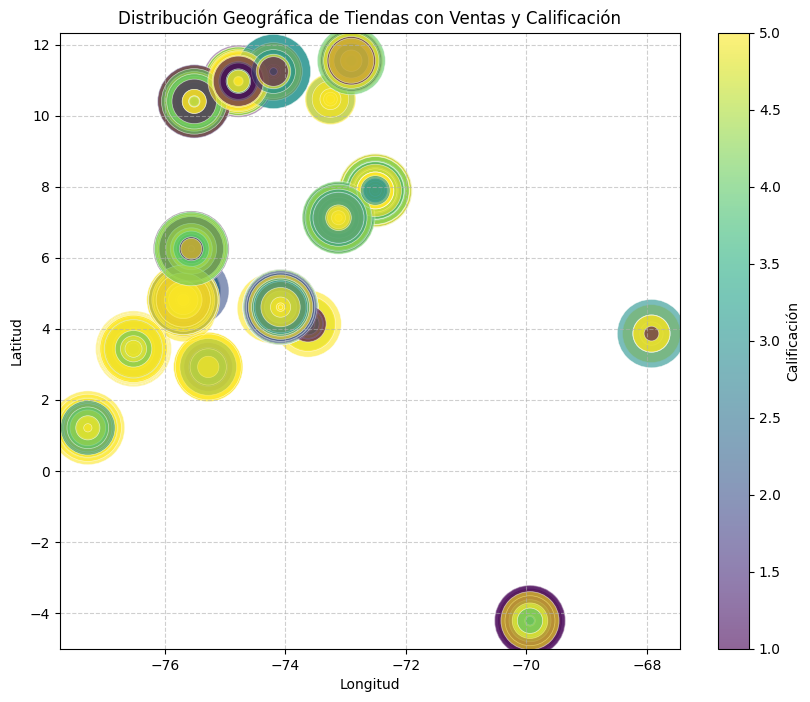

In [42]:
# prompt: el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.
# Desafío:
# Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.
# Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.
# Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.
# Sugerencias:
# Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.
# Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

!pip install folium -q
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Combinar todos los dataframes de tiendas en uno solo para el análisis geográfico
df_combined = pd.concat(tiendas, ignore_index=True)

# Limpiar datos: eliminar filas con latitud o longitud faltantes
df_combined.dropna(subset=['lat', 'lon'], inplace=True)

# Verificar si hay datos válidos después de la limpieza
if not df_combined.empty:
    # Calcular el centro promedio de todas las tiendas para centrar el mapa
    center_lat = df_combined['lat'].mean()
    center_lon = df_combined['lon'].mean()

    # Crear un mapa base usando Folium
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Añadir un Heatmap de las ventas
    # El Heatmap usará las coordenadas (lat, lon) y ponderará los puntos por el precio
    heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_combined.iterrows()]
    HeatMap(heat_data).add_to(m)

    print("\n--- Mapa de Calor de Ventas ---")
    # Mostrar el mapa
    display(m)

    # Scatter plot para visualizar la distribución de tiendas y ventas
    plt.figure(figsize=(10, 8))
    # Usamos el precio para el tamaño de los puntos (s) y la calificación para el color (c)
    scatter = plt.scatter(df_combined['lon'], df_combined['lat'], s=df_combined['Precio']/1000, c=df_combined['Calificación'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.colorbar(scatter, label='Calificación')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Distribución Geográfica de Tiendas con Ventas y Calificación')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


else:
    print("No hay datos válidos (con latitud y longitud) para realizar el análisis geográfico.")


#GRÁFICAS

##1

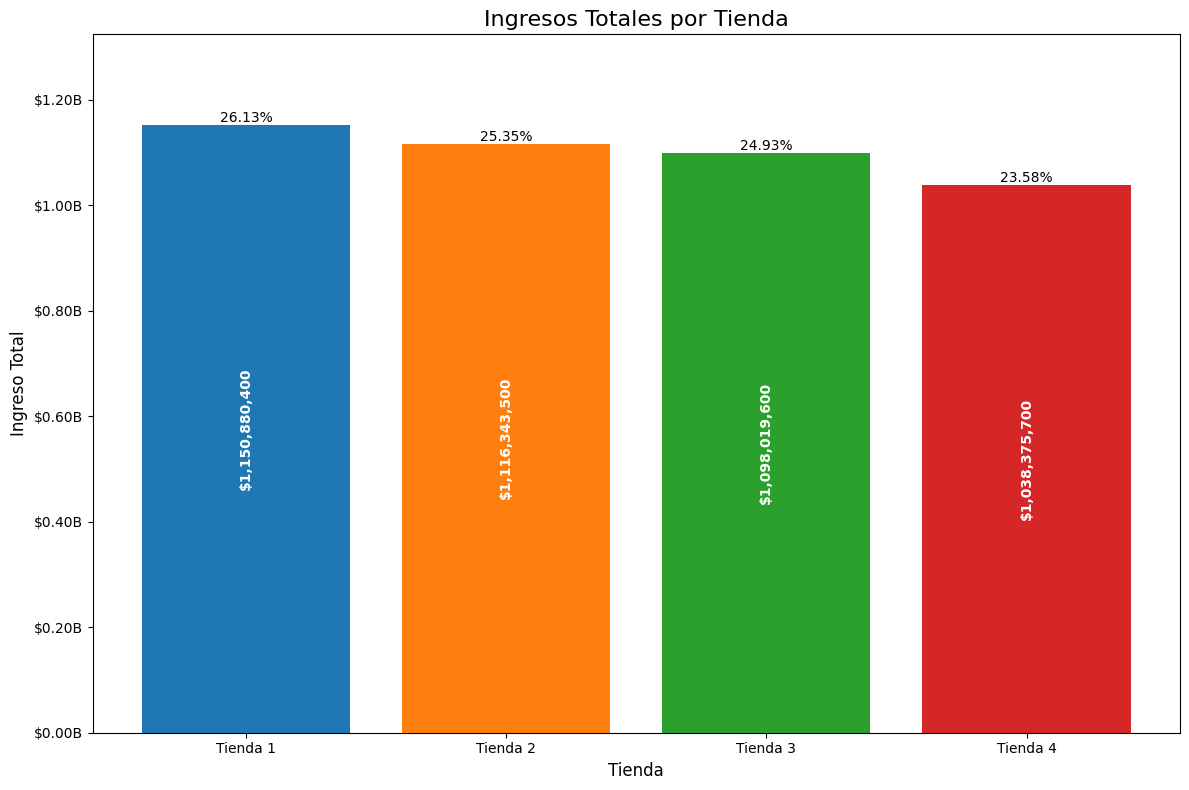

In [50]:
# prompt: CREA LA GRAFICA QUE MEJOR REPRESENTE LO QUE HICIMOS EN EL PUNTO 1:
# Ingreso total tienda 1: $1,150,880,400 (26.13%)
# Ingreso total tienda 2: $1,116,343,500 (25.35%)
# Ingreso total tienda 3: $1,098,019,600 (24.93%)
# Ingreso total tienda 4: $1,038,375,700 (23.58%)
# Ingreso total general: $4,403,619,200
# EN EL PRIMER GRAFICO DE BARRAS EL $ Y EL % SE EMPALMAN, PUEDES PONER EL MONTO DENTRO DE LA BARRA ESCRITO VERTICALMENTE? Y QUE EL % SE MANTENGA ARRIBA DE CADA BARRA PARA HACER TODO MAS LIMPIO.
# Ahora necesito que le des diferente color a cada barra por tienda. También necesito que hagamos 2 cosas importantes... el eje Y lo tenemos como 1e9 y eso es 0 entendible modificalo a trillones o lo que sea necesario. Por otro lado, el % arriba de las barras a veces se sale del cuadro de la grafica, para esto debes hacer que se mantenga dentro aumentando el limite superior del eje Y.
# acabo de borrar el grafico de pastel, no hay problema. prosigamos. tambien necesito que quites las lineas punteadas del grafico eso hace que se vea mas sucio

# Datos de ingresos y porcentajes
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
porcentajes = [porcentaje_tienda1, porcentaje_tienda2, porcentaje_tienda3, porcentaje_tienda4]

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Colores para cada barra
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear el gráfico de barras
barras = ax.bar(tiendas_nombres, ingresos, color=colores)

# Formatear el eje Y para mostrar los valores en billones
# Convertir ingresos a billones y formatear la etiqueta del eje Y
def billones_formatter(x, pos):
    return f'${x/1e9:.2f}B'

ax.yaxis.set_major_formatter(plt.FuncFormatter(billones_formatter))


# Añadir los valores de monto dentro de las barras (verticalmente) y los porcentajes arriba
for bar, ingreso, porcentaje in zip(barras, ingresos, porcentajes):
    # Añadir el monto dentro de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'${ingreso:,.0f}',
            ha='center', va='center', rotation='vertical', color='white', fontsize=10, weight='bold')

    # Añadir el porcentaje encima de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{porcentaje:.2f}%',
            ha='center', va='bottom', fontsize=10)

# Añadir título y etiquetas
ax.set_title('Ingresos Totales por Tienda', fontsize=16)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Ingreso Total', fontsize=12)

# Aumentar el límite superior del eje Y para dar espacio a los porcentajes
# Se puede ajustar el factor multiplicador (ej: 1.10 para un 10% más de espacio)
max_ingreso = max(ingresos)
ax.set_ylim(0, max_ingreso * 1.15)

# Quitar las líneas punteadas (grid lines)
ax.grid(False)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##2

##3

##4

##5

#INFORME FINAL